In [ ]:
# cd C:\Git\Hard_skills
! git add *
! git commit -m "seaborn and pyplot"
! git push origin main

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

In [3]:
df = pd.read_csv("HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


С помощью heatmap можно визуализировать структуру пропусков

<AxesSubplot:>

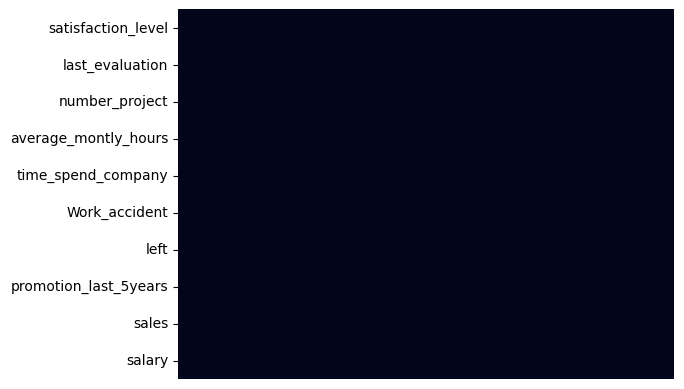

In [4]:
sns.heatmap(df.T.isnull(), cbar=False, xticklabels=False)

<AxesSubplot:xlabel='satisfaction_level', ylabel='last_evaluation'>

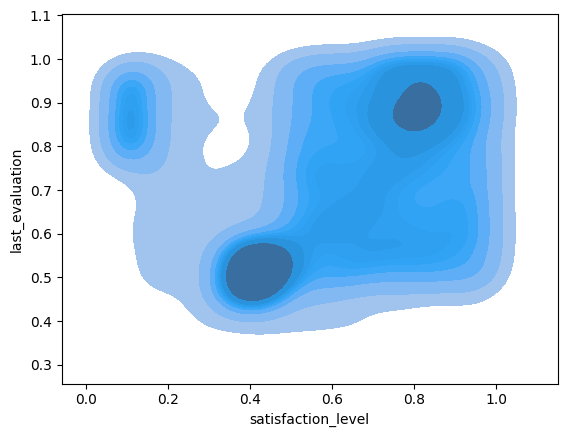

In [3]:
sns.kdeplot(data=df, x='satisfaction_level', y='last_evaluation', fill=True)

Seaborn позволят быстро строить завmисимости в разрезе  
без группировки
для этого нужно использовать hue

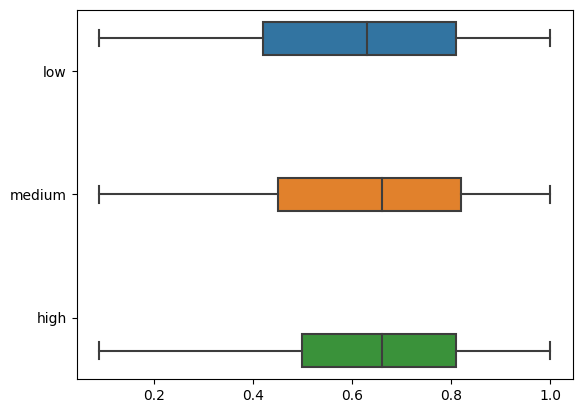

In [13]:
ax = sns.boxplot(data=df, x='satisfaction_level', y='salary', hue='salary')
ax.set(xlabel=None, ylabel=None)
ax.legend_ = None

In [17]:
df['temp'] = 1

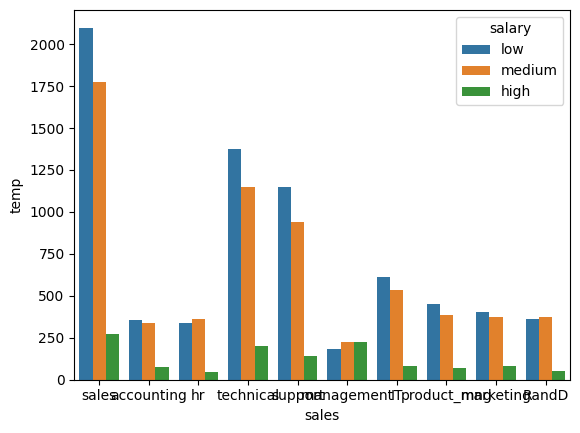

In [19]:
ax = sns.barplot(data=df, y='temp', x='sales', hue='salary', estimator='sum')

У нас есть ось икс и ось игриг для построения графика.
Чтобы построить график нам нужно, чтобы хотя бы одна премення была количественной.
Эта переменная будет откладываться по какой-то оси, а по другой оси мы тогда можем отложить номинативную.
Номинативная будет просто в виде отсечек на оси без определенных знчений. 
Но важно, чтобы одна переменная была количетсвенной, так как нам нужно привязаться к конкретным значениям по какой-то оси.

Также важно понимать, что если у нас две переменные и в одной из них не уникальные значения, например категории или просто для одного игриг есть несколько икс,
то тут линия будет плохо выглядеть, так как для одного икс много игриг и будет куча пересекающихся линий.
Поэтому линия подходит, когда у нас для одного уникального икс есть одно уникальное значение игриг
Но есть ещё вариан упорядочить значения по одной оси, тогда будет меньше пересечений, но все равно линии для таких случаев плохо подходят

Вообще если у нас 2 количественные переменные, то у нас по суить без искуственной дискретизации есть возможность только строить скэттер плот.
Но мы конечно можем одну количественную переменную разделить на категории и строить другие графики.


Вообще график линия не любит непоследовательные данные и наличие большого количества близких значений в разных частях ряда


Если мы выбрали толкьо категориальные переменные для построения графика, то нам нужно из них сделать количетсвенную
Например посчитать value_counts
Если у нас больше 1 категориальной, то тут могут быть разные комбинации.
Но суть такая, мы группируем в каком-то порядке и в результате получаем количество в последней группе.
Тогда у нас внешняя перменная будет идти по оси икс, вторая категориальная, по которой группировка шла вторйо по счету,
будет внутри каждого икс, то есть у нас для одного икс будет несколько игриг.
Другими словами внутренняя группировка создает несколкьо игриг для одной внешней группировки, которая будет по оси икс.

Можно разделить по следующему принципу графики и переменные
* У нас 1 количественная переменная
    * box plot
    * hist
    * violin
    * line plot когда по одной из осей будет просто порядковый номер
* У нас 1 категориальная переменная
    * barplot, но нужно сначала посчитать value_counts и постриоть распределение по количествую каждого значения
* У нас 2 количественные переменные
    * если данные по обоим переменным упорядочены и идут по порядку, то можно попробовать линию, но зависит от количества точек и насколкьо они идут последовательно
    * scatter plot
    * разбить одну из количественных на категории
* У нас 2 категориальные переменные
    * barplot, но сначала группируем в нужном порядке, переменная по которой группируем первой, будет икс, а переменная по которой группируем второй будет
    создавать несколкьо игриков для этого икс. То есть для одной осчетки по оси икс будет несколько баров.
* У нас 1 количественная и 1 категориальная
    * Тут может быть 2 случая
        * если для одного значения категориальной только одно значение икс, то тут просто будет либо bar, либо line
        * если же у нас для одного категориального значения несколько количественных значений, то нам нужно схлопнуть все количественные значения для одной категорилаьной
        в одно значение. Для этого в barplot есть функция estimator. Мы в принципе может сами сгруппирвоать по категориальной переменной и применить лююбую агрегачию и потом уже построить бар плот или лайн плот.
* У нас 1 количественная и 2 категориальные
    * bar plot, выбираем какая категориальная будет по оси икс, а какая будет делить игрик на несокльо баров.



Для построения графиков важно понимать какие переменные подходят к каким графикам. Для одной количественной перменной все просто. Мы можем построить гистограмму,
боксплот, линейный график, где иксом будет просто порядковый номер элемента. Эти графики легко строятся.

Если у нас наминативная переменная, то у нас есть возможность построить распределение по количеству каждого значения этой переменной.
То есть value_count. Это можно сделать просто вызвав метод value_count для колонки и потом для получившейся сириас вызвать медот гистограм.
По оси икс будут индексы, то есть значения нашей колонки исходной, а по игрик будут количество каждой уникальной переменной.
Тут тоже все просто.

<AxesSubplot:>

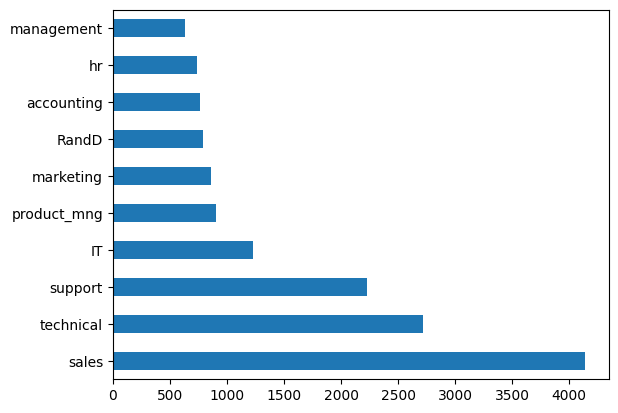

In [13]:
df.sales.value_counts().plot.barh()

В таких графиках важно не забывать, что если мы выбираем ориентацию горизонтальную,
то по оси икс должна быть количественная переменная

<AxesSubplot:xlabel='sales'>

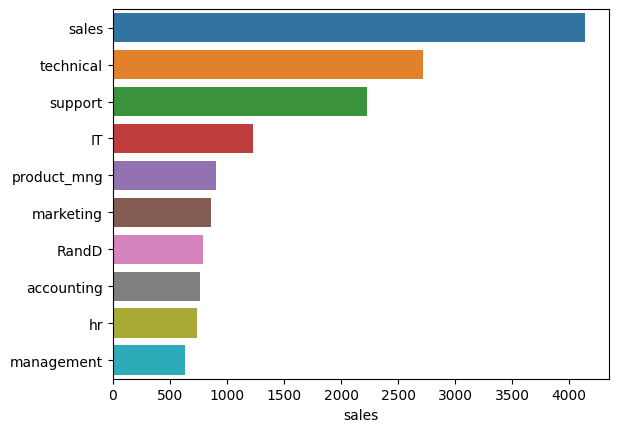

In [22]:
temp = df.sales.value_counts().to_frame()
sns.barplot(temp, y=temp.index, x=temp.sales, orient='h')

Когда у нас есть одна категориальная переменная и одна количественная, при чем категорильаных намного меньше количественных, то есть это разбивка по категориям количественной переменой,
то чтобы изобразить их на одном графике у нас есть 2 варианта, использовать бар чар, но тогда мы должны количественную переменную схлопнуть в одно значение, так как для каждого
икса у нас целый набор игриков. 
Или другой вариант использовать следующие диаграммы, с помощью которых мы можем посмотреть распределение количественной переменной по категориям, не схлопывая в одно значение
Тут по оси икс отмечается количественная переменная, а по игриг категории, и точки искусствено растягиваются вверх и вниз в одной категории. чтобы меньше накладывались
Есть два вида графиков, можно выбрать какой больше нравится

Можно пострить любую количественную переменную в данном случае по игриг будет одна переменная она сама, то есть она не разбивается на несколько категорий, а является одной категорией

swarmplot больше разделяет точки, чем stripplot

<AxesSubplot:xlabel='average_montly_hours'>

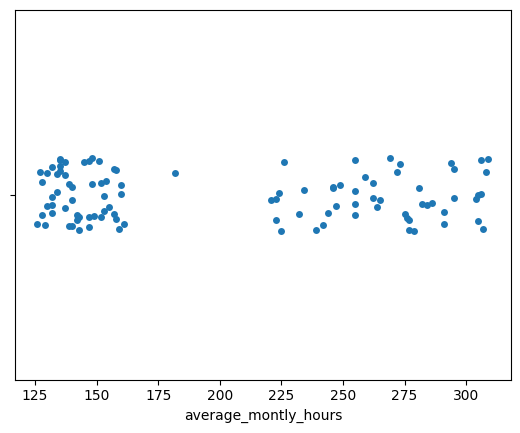

In [23]:
sns.stripplot(df.loc[:100].average_montly_hours, orient='h')

<AxesSubplot:xlabel='average_montly_hours'>

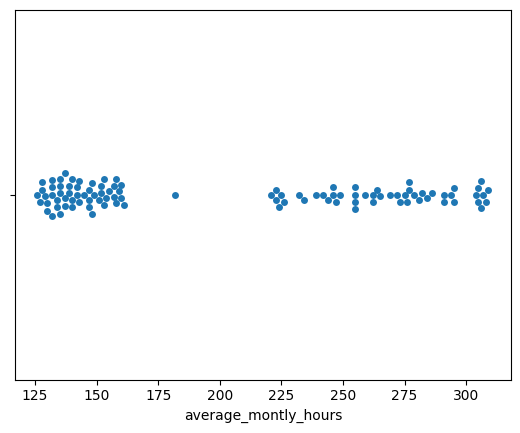

In [3]:
sns.swarmplot(df.loc[:100].average_montly_hours, orient='h')

А можно построить несколько переменных по игрику, то есть мы тут игриг используем как категориальную перменную и по ней разбиваем икс

<AxesSubplot:xlabel='average_montly_hours', ylabel='sales'>

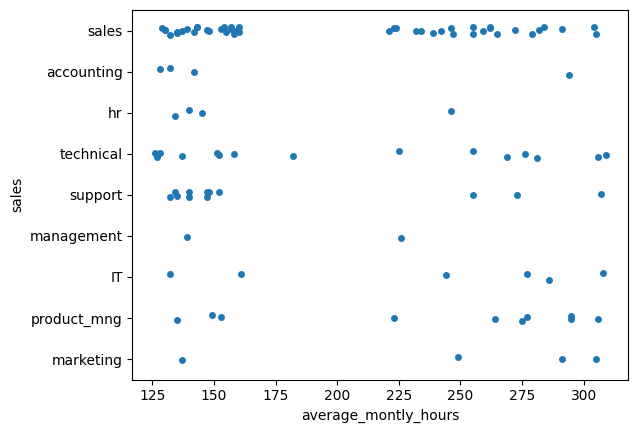

In [21]:
sns.stripplot(df.loc[:100], x='average_montly_hours', y='sales')

<AxesSubplot:xlabel='average_montly_hours', ylabel='sales'>

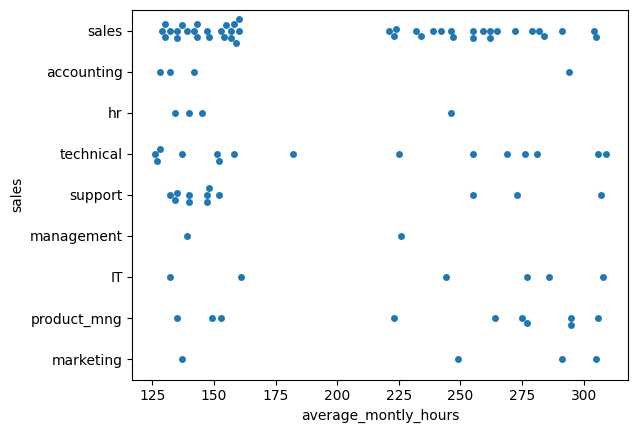

In [4]:
sns.swarmplot(df.loc[:100], x='average_montly_hours', y='sales')

Можно подсветить каждую категорию отдельным цветом
Для этого саму эту перменную отправляем в hue

<AxesSubplot:xlabel='average_montly_hours', ylabel='sales'>

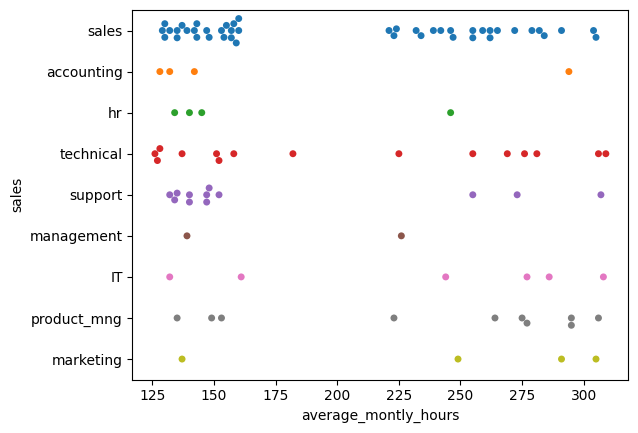

In [6]:
sns.swarmplot(df.loc[:100], x='average_montly_hours', y='sales', hue='sales', legend=False)

А можно добавить ещё одну категориальную переменную, чтобы по ней была подсветка

dodge=True 
Разделяет ряд как бы на несколько рядов по hue
то есть на графике видно, что для каждой категории сверху синий, потом оранжевый и потом зеленый.
Тоже удобно чтобы разделить визуально точки

c:\python\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='average_montly_hours', ylabel='sales'>

c:\python\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\python\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\python\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


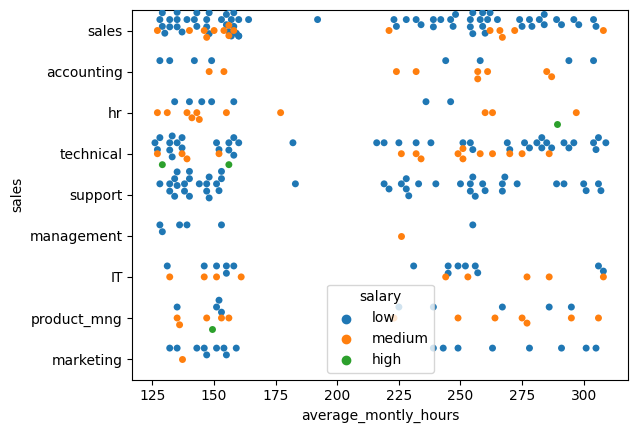

In [88]:
sns.swarmplot(df.loc[:300], x='average_montly_hours', y='sales', hue='salary', dodge=True)

Пример для 2 категориальных
Посмотрим распределение зарплат по отделам. 
У нас тут 2 каетгорилаьные перменные, поэтому нам нужно сделать количественную , в данной случае просто посчитаем полчисетво значений в внутренней категории, которая будет создавать несколько игриг

In [38]:
temp = df[['sales', 'salary']]
temp

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [39]:
temp = temp.groupby(['sales', 'salary'])[['salary']].count().rename(columns={'salary' : 'count'})


count
sales       salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

In [48]:
temp = temp.unstack(level=1)['count']

In [49]:
temp

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<AxesSubplot:xlabel='sales'>

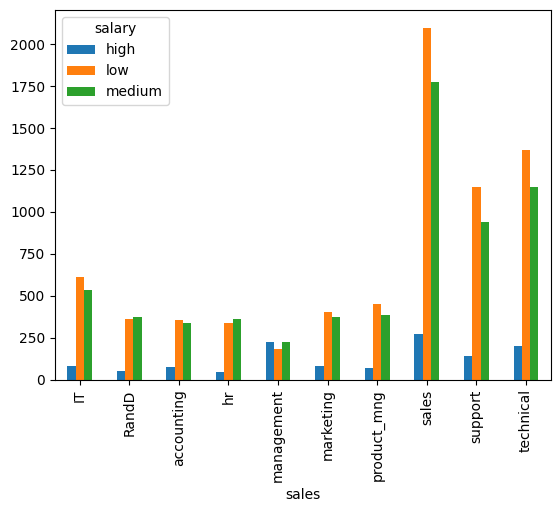

In [51]:
temp.plot.bar()

array([<AxesSubplot:title={'center':'high'}, xlabel='sales'>,
       <AxesSubplot:title={'center':'low'}, xlabel='sales'>,
       <AxesSubplot:title={'center':'medium'}, xlabel='sales'>],
      dtype=object)

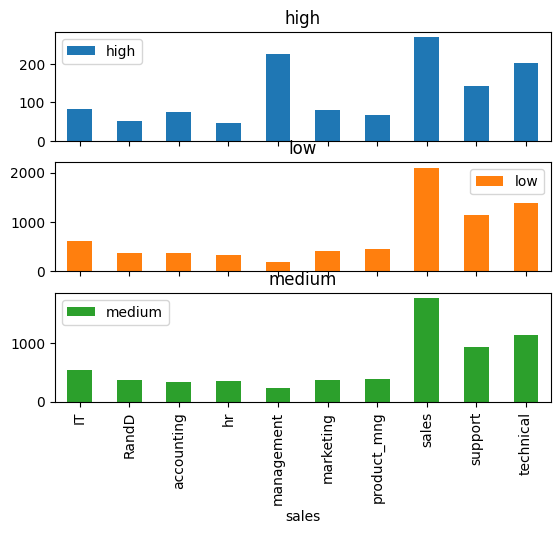

In [50]:
temp.plot.bar(subplots=True)

Можно было сделать через pivot table
Вместо left можно взять любой столбец, так как мы считаем просто количество внтри внутренней группировки по salary

In [52]:
pd.pivot_table(df, index='sales', columns='salary', aggfunc='count')['left']

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


Думаю самое удобное использовать hue в seaborn, тогда достаточно просто сгруппировать и сбросить индекс

In [70]:
temp = df.groupby(['sales', 'salary'])[['salary']].count().rename(columns={'salary' : 'count'})
temp = temp.reset_index()

In [71]:
temp

,sales,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


Тут важный момент, мы сгруппировали и агрегировали по count и у нас для одного значения salary одно значение count.
Поэтому estimator применит среднее значение, но оно одно и будет оно само


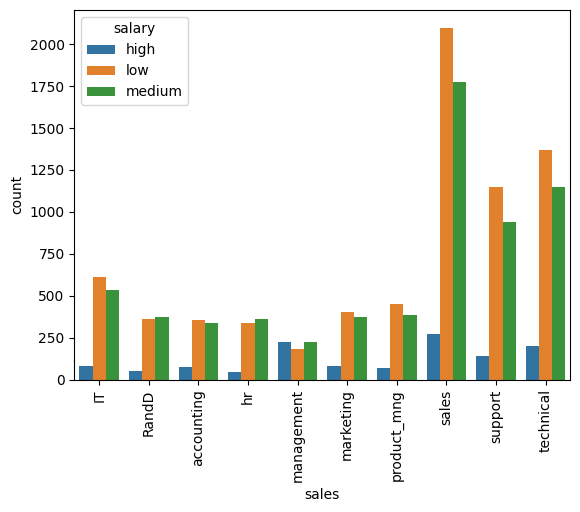

In [79]:
sns.barplot(temp, x='sales', y='count', hue='salary', errorbar=None)
plt.xticks(rotation=90)
pass

Но если бы мы не делали hue, то у нас бы было несколько значений для одного значения внешней группировки
для одного sales несколько count
Тут бы нужно было выбирать правильную функцию схлопывания
По умолчанию бы он взял среднее значение count

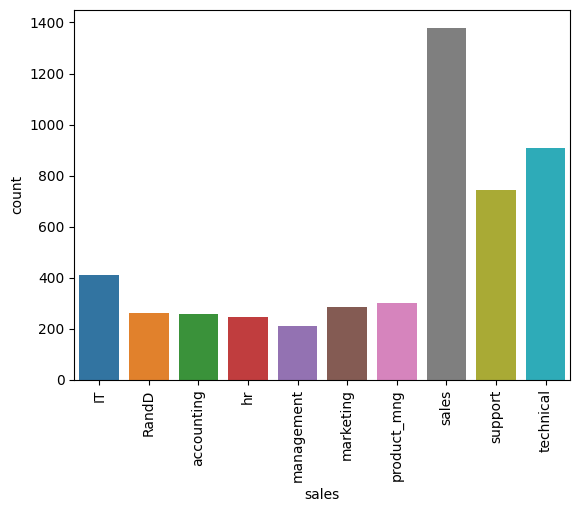

In [80]:
sns.barplot(temp, x='sales', y='count', errorbar=None)
plt.xticks(rotation=90)
pass

Также для одной количественной и одной или несколькоих категорильных переменных мы можем построить бар чары.
Тут важно понимать, что если мы хотим построить количественную переменную в разрезе категориальных,
то мы можем взять каждую категориальную либо внешней, либо внутренней.
Тут все будет также как для 2 категориальных, только нам не нужно создавать количественную перменную.

In [81]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Посмотрим распределение среднего значения average_montly_hours по отделам и ещё и в разрезе зарплат.

In [84]:
temp = df[['average_montly_hours', 'sales', 'salary']]

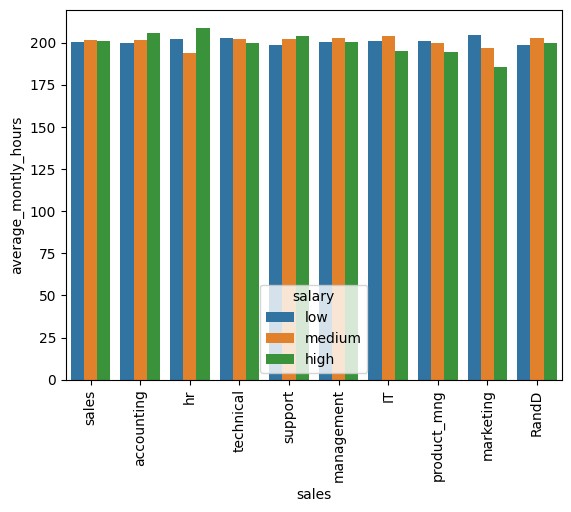

In [85]:
sns.barplot(temp, x='sales', y='average_montly_hours', hue='salary', estimator='mean', errorbar=None)
plt.xticks(rotation=90)
pass